In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
convert_ip_numeric = lambda x:int(ipaddress.IPv4Address(x))
ip_address_conversion = X_train['IP_Address']
ip_address_conversion = ip_address_conversion.map(convert_ip_numeric)
X_train['ip_numeric'] = ip_address_conversion
del(ip_address_conversion)

### Getting upper & lower bounds for IP at country level

ip_country.head()
ip_low_bound = ip_country['lower_bound_ip_address'].map(convert_ip_numeric)
ip_upper_bound = ip_country['upper_bound_ip_address'].map(convert_ip_numeric)
ip_country['lower_bound_ip_numeric'] = ip_low_bound
ip_country['upper_bound_ip_numeric'] = ip_upper_bound

del(ip_low_bound,ip_upper_bound)

ip_country.head()


### CHECK IF NEEDED

ip_country_summary = ip_country.groupby(['country']).agg({'lower_bound_ip_numeric':'min','upper_bound_ip_numeric':'max'})
ip_country_summary.to_csv('ip_address_numeric_map.csv')
ip_country_summary.head()

ip_country_summary.count() #235lower_bound_ip_numeric
ip_country_summary.reset_index(inplace=True)

ip_country_summary.count()

### Continue Train Pre-Processing 

train_ipadrres = X_train['ip_numeric'].reset_index()
type(train_ipadrres)

train_ipadrres['key'] = 1
ip_country['key'] = 1



train_ipadrres.shape  #(43370,)
for i in range(0,1):
    temp = pd.merge(train_ipadrres.loc[i,:].reset_index(),ip_country,on='key',validate='many_to_many')
    merged = Temp[Temp.ip_numeric.between(Temp.lower_bound_ip_numeric,Temp.upper_bound_ip_numeric)]


#del(train_ipadrres,ip_country_join)

train_ipadrres['key'] = 1
ip_country['key'] = 1
Temp = pd.merge(train_ipadrres,ip_country,on='key')
#Result = Temp[Temp.A_value.between(Temp.B_low,Temp.B_high)]

train_merged_country.query('ip_numeric >= lower_bound_ip_numeric and ip_numeric <=upper_bound_ip_numeric',inplace=True)

train_merged_country.head()

ip_country[ip_country['country']=='Afghanistan'].to_csv("Afghan-IPs.csv")

X_train.loc[X_train['ip_numeric']==1876585470 ,['IP_Address','ip_numeric']]

train_merged_country.count()`

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#!pip install ipaddress
import ipaddress

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

order = pd.read_csv('train_order_data.csv')
merch = pd.read_csv('train_merchant_data.csv')
target = pd.read_csv('train.csv')
ip_country = pd.read_csv('ip_boundaries_countries.csv')

#Sanity Check for Train Dataset (Orders)
order.head()
order.count() #54213
order['Order_ID'].nunique() #54213 -- No duplicates found on order ID 

#Sanity Check for Train Dataset (Merchants)
merch.count() #54213
merch['Merchant_ID'].nunique() #54213 -- No duplicates found on Merchant_ID

merch.head()

#Customer_id and Order ID are almost varying by record. Can be dropped 

order['Customer_ID'].nunique() #34081
order['Order_ID'].nunique() #54213 - No predictive power

order.head()

#join orders and merchants data on Merchant ID 
merged_data = pd.merge(order, merch, how='inner', on = 'Merchant_ID') 
merged_data.head()

del(order,merch)

target.head()
target['Merchant_ID'].nunique() #54213 -- No duplicates on Merchant ID. OK to join 


#join train data with y_train data to get it all together
merged_data = pd.merge(merged_data, target, how='inner', on = 'Merchant_ID') 

In [2]:
merged_data.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster
0,126221,37cea9512f8d,4/29/2018 16:39,148,Direct,Credit Card,124231,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,0
1,115471,09f12e6efde2,6/16/2018 17:05,145,SEO,Credit Card,136178,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,0
2,151786,4e69e956e159,10/26/2018 18:00,62,Ads,Internet Banking,198611,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,1
3,140456,663443aaeb82,12/12/2018 5:41,28,SEO,Debit Card,127993,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,0
4,114721,99258810c121,9/20/2018 11:06,70,Ads,Credit Card,250146,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
fraud = merged_data[merged_data['Fraudster'] == 1]

In [11]:
fraud.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster
2,151786,4e69e956e159,10/26/2018 18:00,62,Ads,Internet Banking,198611,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,1
9,128964,8551ac9908b4,1/6/2018 15:16,45,Direct,Credit Card,113335,1746213,2018-01-04 15:16:02,GXZWUMERANRMA,M,38,35.163.82.112,1
13,113867,3c9e9f67c442,6/30/2018 5:18,148,SEO,Cash On Delivery,160755,1746213,2018-04-07 05:56:20,UAKQGMLEWLZZQ,F,31,125.204.126.104,1
24,114073,1571acb42236,1/8/2018 16:34,108,Ads,Credit Card,354423,1746213,2018-01-06 16:34:52,WUXLPPRQNDNKH,M,30,135.127.44.181,1
30,123558,1d60cc3f92d0,9/17/2018 13:51,160,Direct,E-wallet,354076,1746213,2018-06-04 23:12:21,YYSEILBQEGMNY,F,36,63.216.8.155,1


In [25]:
fraudbypayment = fraud.groupby(['Order_Payment_Method'])['Fraudster'].sum().reset_index()
fraudbypayment.head()

,Order_Payment_Method,Fraudster
0,Cash On Delivery,112
1,Credit Card,2162
2,Debit Card,816
3,E-wallet,801
4,Internet Banking,1134


In [21]:
nonfraud = merged_data[merged_data['Fraudster'] == 0]
nonfraudbypayment = nonfraud.groupby(['Order_Payment_Method'])['Order_ID'].nunique().reset_index()

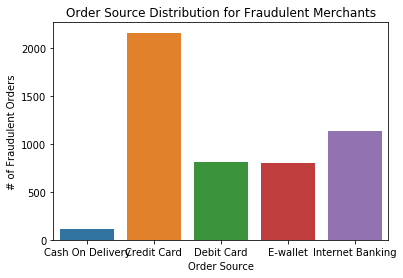

In [26]:
fig = sns.barplot(x=fraudbypayment.Order_Payment_Method,y=fraudbypayment.Fraudster) #barplot for continent by country count
plt.xlabel('Order Source')
plt.ylabel('# of Fraudulent Orders')
plt.title("Order Source Distribution for Fraudulent Merchants")
plt.show(fig)


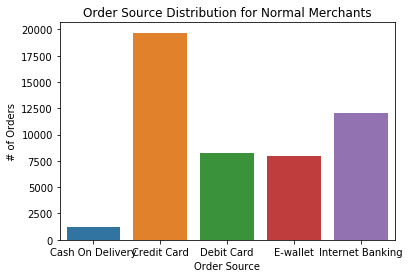

In [23]:
fig = sns.barplot(x=nonfraudbypayment.Order_Payment_Method,y=nonfraudbypayment.Order_ID) #barplot for continent by country count
plt.xlabel('Order Source')
plt.ylabel('# of Orders')
plt.title("Order Source Distribution for Normal Merchants")
plt.show(fig)
